### TMDB Movie Data

I have selected TMDB Movie Data for this project. In this dataset, there are list of movies along with their features like Cast, Director, Genre, Release Date & Year, Revenue & Budget, Runtime etc.

In this project, my target would be to find the answer to the following questions, as a part of my overall analysis.

1. What are the top Genre of which movies are made?
2. What is the trend of number of movies released year by year?
3. In which month of the year, maximum number of movies are released?
4. Which Actors have acted in the maximum number of movies?
5. Which is the top 5 production companies under which movies are made?
6. How the runtime of the movies has varied across the years?
7. What is budget under which maximum number of movies are made?
8. What is the revenue happening for maximum number of movies?
9. What is the trend of vote received across the movies?
10. What is the trend of the movie Budget in all the years?
11. What is the trend of the revenue earned by movies in all the years?
12. Is Vote average related with Popularity, runtime, Budget and revenue of the movie?
13. What is correlation of Revenue with Popularity, runtime and Budget?
14. What is average revenue earned across the months of a year?


In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 1000
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
moviesdata = pd.read_csv("tmdb-movies.csv")

### Basic understanding of the dataset and Wrangling of the data

In [3]:
moviesdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Checking the basic details of the dataset
print(moviesdata.shape)
print(moviesdata.info())

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

In [5]:
moviesdata.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### From the initial analysis, it is observed that the dataset contains 10865 rows and 21 features, with float64(4), int64(6), object(11) datatypes.

#### I already have Release Year of the Movies in the dataset, but I think release month will play an important role in the overall analysis. Hence, extracting the same from release date. 

In [6]:
moviesdata['release_month'] = moviesdata['release_date'].apply(lambda x: x.split("/")[0]).astype(int)

In [7]:
moviesdata['release_month'].unique()

array([ 6,  5,  3, 12,  4,  9, 10,  2,  1,  7, 11,  8])

In [8]:
# # replacing numerical values of month with month names
# moviesdata.release_month.replace(['1','2','3','4','5','6','7','8','9','10','11','12'],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'],inplace = True)

In [9]:
# moviesdata['release_month'].unique()

#### Cast and Genre column contains multiple values separated by '|'. Further, to do the analysis on different Genres and Actors, it is required to split them and store in separate columns in the dataset. 

In [10]:
# Splitting Cast and storing the same in the new columns
moviesdata[['c1','c2','c3','c4','c5']] = moviesdata.cast.apply(lambda x: pd.Series(str(x).split("|")))

In [11]:
# Splitting Genres and storing the same in the new columns
moviesdata[['g1','g2','g3','g4','g5']] = moviesdata.genres.apply(lambda x: pd.Series(str(x).split("|")))

In [12]:
# Splitting Production companies and storing the same in the new columns
moviesdata[['pc1','pc2','pc3','pc4','pc5']] = moviesdata.production_companies.apply(lambda x: pd.Series(str(x).split("|")))

#### I have extracted all required data from the existing columns as a part of in-depth analysis w.r.t. those features

* for example, extracting month from release date and storing it in new column 'releasing_month'

* Splitting Genres, Cast and Production_companies into separate features.

#### Further, I will clean up the dataset which will help in proper analysis. For example, dropping columns which are not important, removing the rows on the basis of null values etc

In [13]:
moviesdata.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'release_month', 'c1', 'c2', 'c3', 'c4', 'c5', 'g1',
       'g2', 'g3', 'g4', 'g5', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5'],
      dtype='object')

#### Checking Duplicate record in the dataset.

In [14]:
duplicate = moviesdata[moviesdata.duplicated()]

In [15]:
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,c1,c2,c3,c4,c5,g1,g2,g3,g4,g5,pc1,pc2,pc3,pc4,pc5
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,3,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,NaN,NaN,NaN


In [16]:
moviesdata[moviesdata['id']==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,c1,c2,c3,c4,c5,g1,g2,g3,g4,g5,pc1,pc2,pc3,pc4,pc5
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,3,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,NaN,NaN,NaN
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0,3,Jon Foo,Kelly Overton,Cary-Hiroyuki Tagawa,Ian Anthony Dale,Luke Goss,Crime,Drama,Action,Thriller,Science Fiction,Namco,Light Song Films,NaN,NaN,NaN


#### So, only one duplicate record is present in the dataset. I will reomove the same.

In [17]:
moviesdata = moviesdata.drop_duplicates()
print(moviesdata.info())
print("Movies Data Shape:", moviesdata.shape)
moviesdata.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,6.827612
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,3.441764
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,10.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


#### As per my understand, some of the colums will not help in any kind of analysis, hence I will remove them from the dataset.

In [18]:
#Removing columns - 'imdb_id', 'original_title', 'homepage', 'keywords', 'tagline', 'overview', 'keywords'

moviesdata = moviesdata[['id', 'popularity','budget', 'revenue', 'cast', 'director', 'runtime', 'genres',
                         'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year',
                         'budget_adj', 'revenue_adj', 'release_month', 'g1', 'g2', 'g3', 'g4', 'g5', 'c1',
                         'c2', 'c3', 'c4', 'c5', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5']]

In [19]:
print(moviesdata.shape)
print(moviesdata.info())
moviesdata.head()

(10865, 31)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   runtime               10865 non-null  int64  
 7   genres                10842 non-null  object 
 8   production_companies  9835 non-null   object 
 9   release_date          10865 non-null  object 
 10  vote_count            10865 non-null  int64  
 11  vote_average          10865 non-null  float64
 12  release_year          10865 non-null  int64  
 13  budget_adj            10865 non-null  float64
 14  revenue_adj           10865 non-null  float64
 15  release

,id,popularity,budget,revenue,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,g1,g2,g3,g4,g5,c1,c2,c3,c4,c5,pc1,pc2,pc3,pc4,pc5
0,135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,6,Action,Adventure,Science Fiction,Thriller,NaN,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,5,Action,Adventure,Science Fiction,Thriller,NaN,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,NaN,NaN,NaN
2,262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3,Adventure,Science Fiction,Thriller,NaN,NaN,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,NaN
3,140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,Action,Adventure,Science Fiction,Fantasy,NaN,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,NaN,NaN
4,168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,4,Action,Crime,Thriller,NaN,NaN,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [20]:
# Checking uniqueness of the data in the columns
print(moviesdata.nunique())

id                      10865
popularity              10814
budget                    557
revenue                  4702
cast                    10719
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
release_month              12
g1                         21
g2                         20
g3                         20
g4                         20
g5                         19
c1                       4301
c2                       5644
c3                       6414
c4                       7045
c5                       7312
pc1                      3058
pc2                      3228
pc3                      2497
pc4                      1497
pc5                       889
dtype: int64


In [21]:
# Checking number of values in each column
print(moviesdata.isnull().sum())

id                          0
popularity                  0
budget                      0
revenue                     0
cast                       76
director                   44
runtime                     0
genres                     23
production_companies     1030
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
release_month               0
g1                          0
g2                       2351
g3                       5787
g4                       8885
g5                      10324
c1                          0
c2                        220
c3                        310
c4                        419
c5                        732
pc1                         0
pc2                      4470
pc3                      7049
pc4                      8812
pc5                      9739
dtype: int64


In [22]:
# Calculating percentage of missing values in each feature
round(100*(moviesdata.isnull().sum()/len(moviesdata.index)),2)

id                       0.00
popularity               0.00
budget                   0.00
revenue                  0.00
cast                     0.70
director                 0.40
runtime                  0.00
genres                   0.21
production_companies     9.48
release_date             0.00
vote_count               0.00
vote_average             0.00
release_year             0.00
budget_adj               0.00
revenue_adj              0.00
release_month            0.00
g1                       0.00
g2                      21.64
g3                      53.26
g4                      81.78
g5                      95.02
c1                       0.00
c2                       2.02
c3                       2.85
c4                       3.86
c5                       6.74
pc1                      0.00
pc2                     41.14
pc3                     64.88
pc4                     81.10
pc5                     89.64
dtype: float64

#### As the % of null values present in the g5 and pc5 column is 90% and above, I am removing them from the dataset. 

In [23]:
#Removing columns - 'g5', 'pc5',

moviesdata = moviesdata[['id','popularity','budget', 'revenue', 'cast', 'director', 'runtime', 'genres',
                         'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year',
                         'budget_adj', 'revenue_adj', 'release_month', 'g1', 'g2', 'g3', 'g4', 'c1',
                         'c2', 'c3', 'c4', 'c5', 'pc1', 'pc2', 'pc3', 'pc4']]

In [24]:
df = moviesdata['revenue'] == 0
df.value_counts()

True     6016
False    4849
Name: revenue, dtype: int64

### Exploratory Data Analysis

#### I will start with Univariate Analysis.

In [25]:
df_genre = pd.concat([moviesdata['g1'], moviesdata['g2'], moviesdata['g3'], moviesdata['g4']]).value_counts()

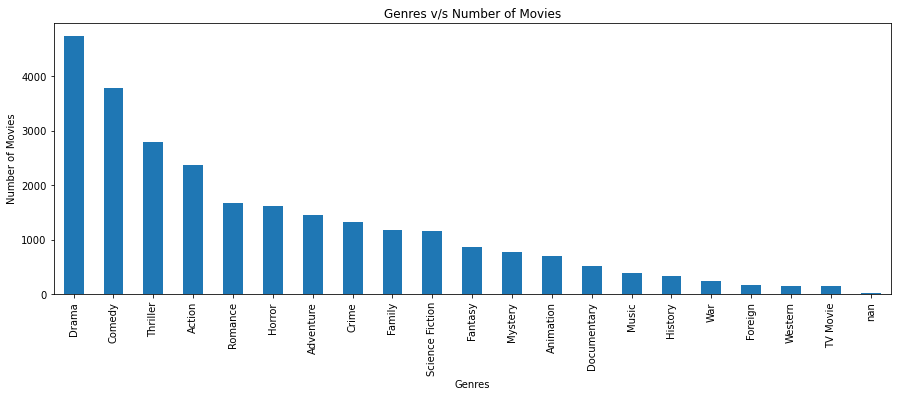

In [26]:
# Number of Movies w.r.t Genres

plt.subplots(figsize = (15,5))
df_genre.plot(kind='bar')
plt.title('Genres v/s Number of Movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies');
plt.show()

#### Drama tops the list of most number of genres of the movies, followed by Comedy, Thriller, Action and Romance respectively.

In [27]:
df_cast = pd.concat([moviesdata['c1'], moviesdata['c2'], moviesdata['c3'], moviesdata['c4'], moviesdata['c5']]).value_counts().iloc[:15]

In [28]:
df_cast.drop(df_cast.index[0], inplace=True)

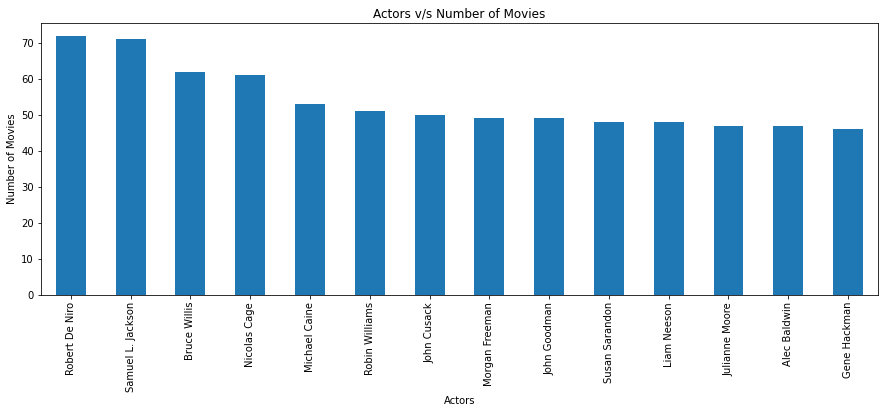

In [29]:
# Number of Movies w.r.t Actors

plt.subplots(figsize = (15,5))
df_cast.plot(kind='bar')
plt.title('Actors v/s Number of Movies')
plt.xlabel('Actors')
plt.ylabel('Number of Movies');
plt.show()

#### Robert De Niro has acted in the maximum number of movies. Samuel L Jackson and Bruce Wills follows in the list.

In [30]:
moviesdata.columns

Index(['id', 'popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'release_month', 'g1', 'g2', 'g3', 'g4', 'c1', 'c2', 'c3', 'c4', 'c5',
       'pc1', 'pc2', 'pc3', 'pc4'],
      dtype='object')

In [31]:
df_prodcomp = pd.concat([moviesdata['pc1'], moviesdata['pc2'], moviesdata['pc3'], moviesdata['pc4']]).value_counts().iloc[:15]

In [32]:
df_prodcomp.drop(df_prodcomp.index[0], inplace=True)

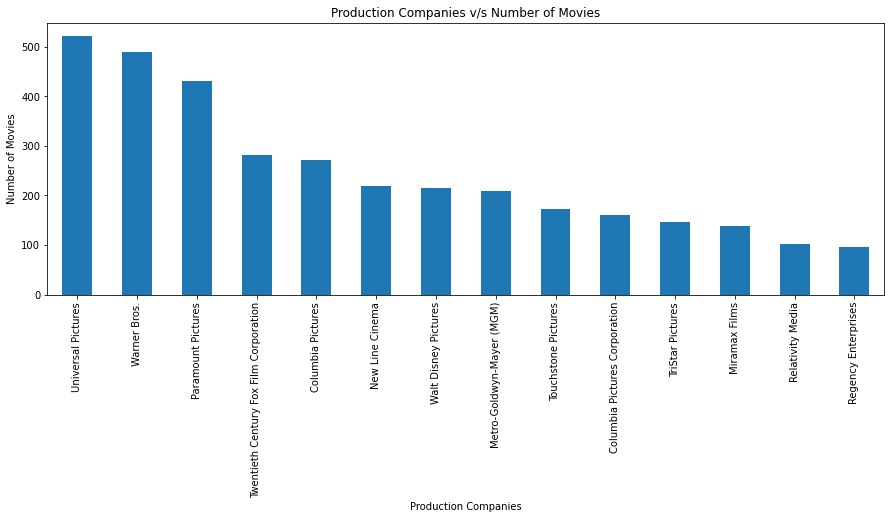

In [33]:
# Number of Movies w.r.t Production Movies

plt.subplots(figsize = (15,5))
df_prodcomp.plot(kind='bar')
plt.title('Production Companies v/s Number of Movies')
plt.xlabel('Production Companies')
plt.ylabel('Number of Movies');
plt.show()

#### Most number of movies are made under the Production company - 'Universal Pictures'. This is followed by Warner Bros and Paramount Pictures.

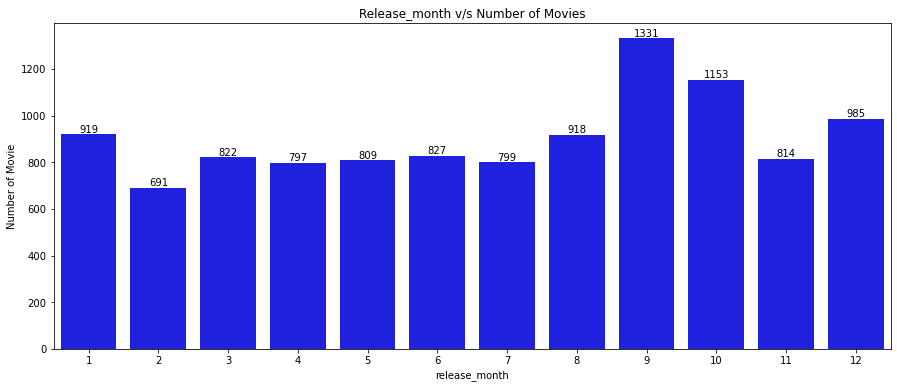

In [34]:
# Release_month v/s Number of Movies
#month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

plt.subplots(figsize = (15,6))
a = sns.countplot(data=moviesdata, x='release_month', color='Blue')
for p in a.patches:
             a.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.title('Release_month v/s Number of Movies')
plt.xlabel('release_month')
plt.ylabel('Number of Movie');
plt.show()

#### Most of the movies are released in the month of September, followed by October, December, January and August. It means, most number of movies are released towards the end of the year.

Text(0, 0.5, 'Runtime')

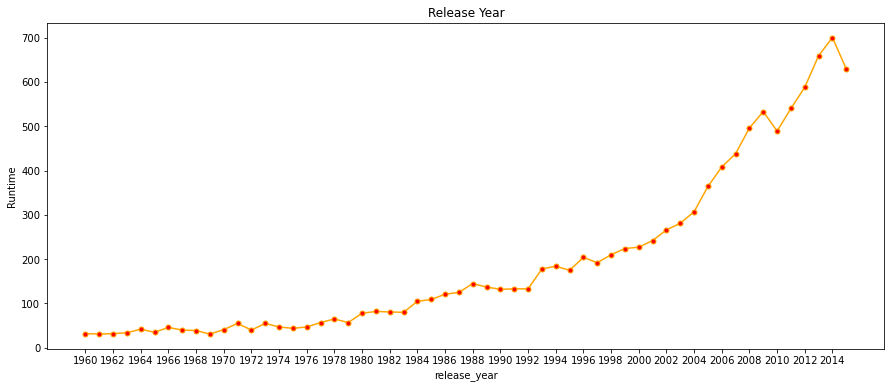

In [35]:
#check the average revenue and adjusted revenue for each year
plt.subplots(figsize = (15,6))

moviesdata.groupby('release_year').count()['id'].plot(kind='line', marker='o', markerfacecolor='red', 
                                        markersize=5, color='orange', xticks = np.arange(1960,2016,2));

plt.title('Release Year')
plt.ylabel('Runtime')

#### Number of movies released per year is in increasing trend and Year - 2014 had the maximum number of movies released

### Now I will analyse the Data on the basis of Budget and Revenue.

In [36]:
print ('Budget:')
print (moviesdata['budget'].value_counts().iloc[:5])
print("")
print ('Revenue:')
print(moviesdata['revenue'].value_counts().iloc[:5])

Budget:
0           5696
20000000     190
15000000     183
25000000     178
10000000     176
Name: budget, dtype: int64

Revenue:
0           6016
12000000      10
10000000       8
11000000       7
6000000        6
Name: revenue, dtype: int64


#### It is observed that most of the movies budget and revenue has been inputed as 0. I will exclude these Movies with Budget and Revenue as 0 as a part of my analysis. 

In [37]:
budget_df = moviesdata['budget'].value_counts()
revenue_df = moviesdata['revenue'].value_counts()

In [38]:
budget_df.drop(budget_df.index[0], inplace=True)
revenue_df.drop(revenue_df.index[0], inplace=True)

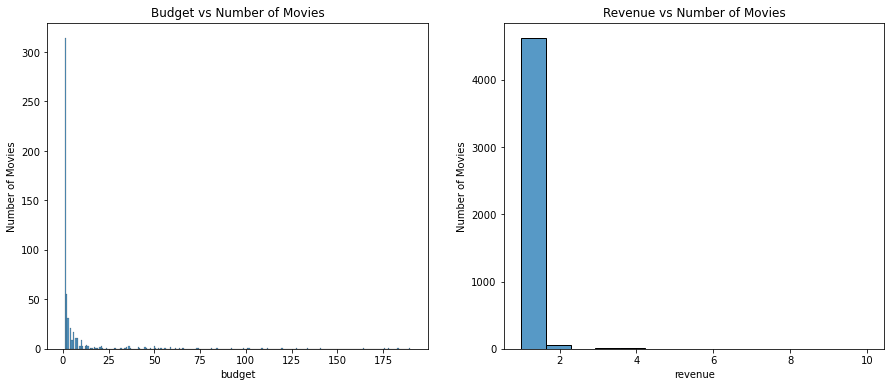

In [39]:
# Budget and Revenue wise number of Movies. plt.figure(1)
plt.subplots(figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(budget_df)
plt.title('Budget vs Number of Movies')
plt.ylabel('Number of Movies');
plt.subplot(1,2,2)
sns.histplot(revenue_df)
plt.title('Revenue vs Number of Movies')
plt.ylabel('Number of Movies');
plt.show()

#### Maximum number of movies are made with Low Budget and receives less Revenue.

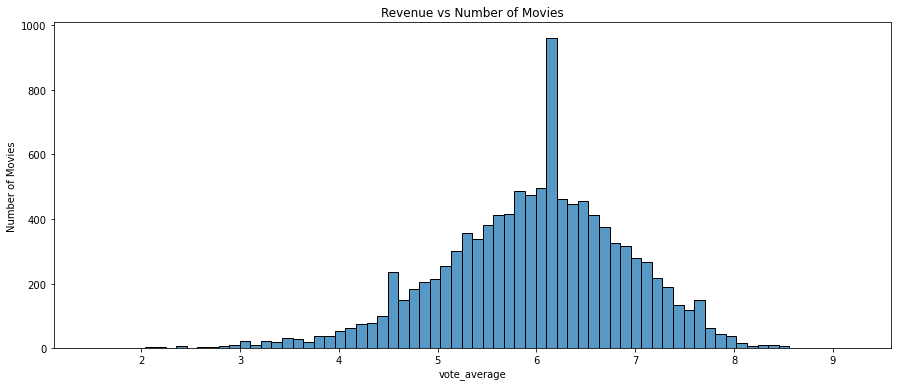

In [40]:
# Budget and Revenue wise number of Movies. plt.figure(1)
plt.subplots(figsize = (15,6))
sns.histplot(moviesdata['vote_average'])
plt.title('Revenue vs Number of Movies')
plt.ylabel('Number of Movies');
plt.show()

#### Maximum number of movies has recieved average of vote_average i.e. vote_average of around 6.2.

Text(0, 0.5, 'Runtime')

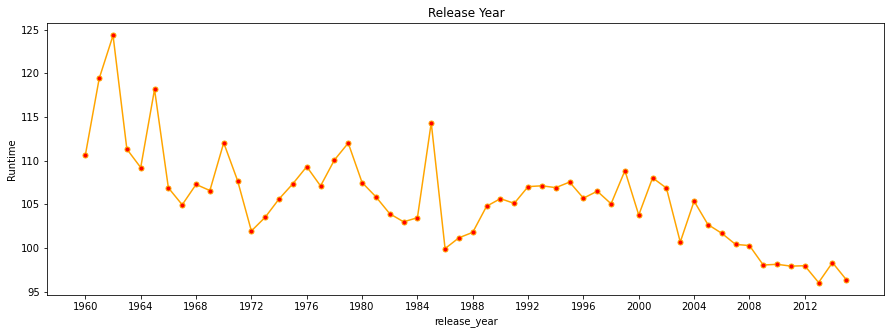

In [41]:
#check the trend of the movie runtime across the years
plt.subplots(figsize = (15,5))

moviesdata.groupby('release_year')['runtime'].mean().plot(kind='line', marker='o', markerfacecolor='red', 
                                        markersize=5, color='orange', xticks = np.arange(1960,2016,4));

plt.title('Release Year')
plt.ylabel('Runtime')

Text(0, 0.5, 'Revenue')

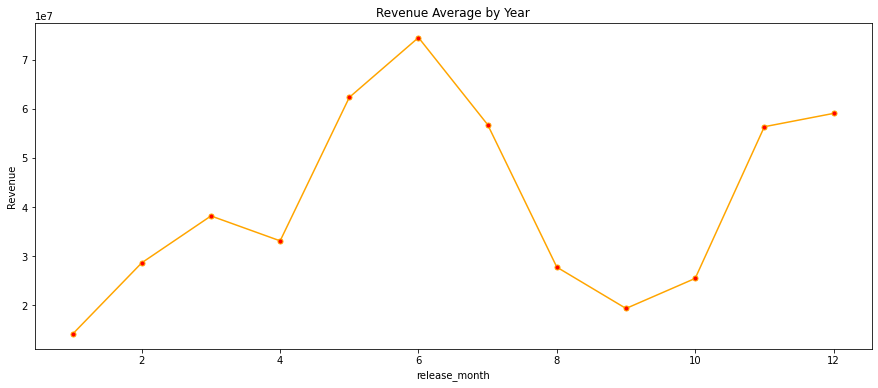

In [42]:
#check the average of revenue w.r.t. to releasing month
plt.subplots(figsize = (15,6))
x = moviesdata.groupby('release_month')['revenue'].mean()

x.plot(kind='line', marker='o', markerfacecolor='red', markersize=5, color='orange');

plt.title('Revenue Average by Year')
plt.ylabel('Revenue')

#### Though, comparatively less number of movies are released in the months between May to July, but maximum revenue is generated during this period only.

In [43]:
moviesdata.columns

Index(['id', 'popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj',
       'release_month', 'g1', 'g2', 'g3', 'g4', 'c1', 'c2', 'c3', 'c4', 'c5',
       'pc1', 'pc2', 'pc3', 'pc4'],
      dtype='object')

#### It is observed that the runtime of the movies has been decreased as the years has passed

### Below are the summary of observations from Univariate analysis:

1. Maximum number of movies are 'Drama' based movies.
2. Universal Pictures tops the list in making movies are their production house.
3. Maximum number of movies are released in September and October month.
4. Number of movies per year is increasing year-by-year.
5. Maximum number of movies are made with low budget and have low revenue.
6. Movie runtime is in decreasing trend.

### Further, I will move ahead with Bivariate and Multivariate analysis.

In [44]:
# corr = moviesdata.corr()
# cm = sns.light_palette('green', as_cmap=True)
# corr.style.background_gradient(cmap=cm).set_precision(2)

Text(0, 0.5, 'Revenue')

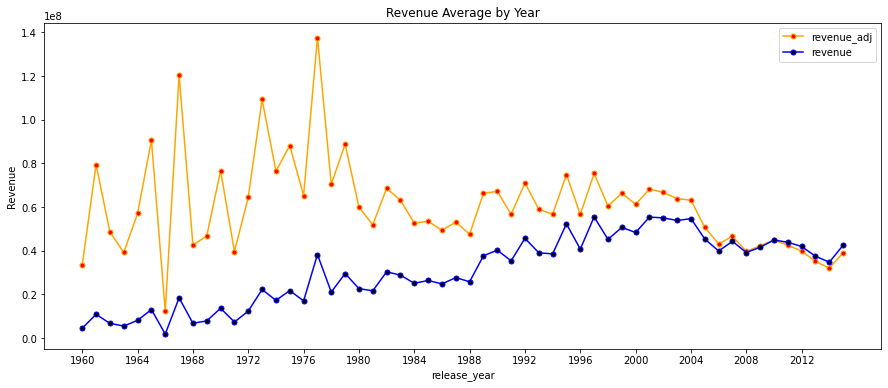

In [45]:
#check the average of revenue and adjusted revenue for each year
plt.subplots(figsize = (15,6))
y = moviesdata.groupby('release_year')['revenue'].mean()
x = moviesdata.groupby('release_year')['revenue_adj'].mean()

x.plot(kind='line', marker='o', markerfacecolor='red', markersize=5, color='orange', xticks = np.arange(1960,2016,4));
y.plot(kind='line', marker='o', markerfacecolor='black', markersize=5, color='blue', xticks = np.arange(1960,2016,4));

plt.gca().legend(('revenue_adj','revenue'))

plt.title('Revenue Average by Year')
plt.ylabel('Revenue')

#### Though the actual revenue is in increasing trend, but trend of adjusted revenue shows that good revenues has been observed in the earlier years in comparison with recent years.

Text(0, 0.5, 'Budget')

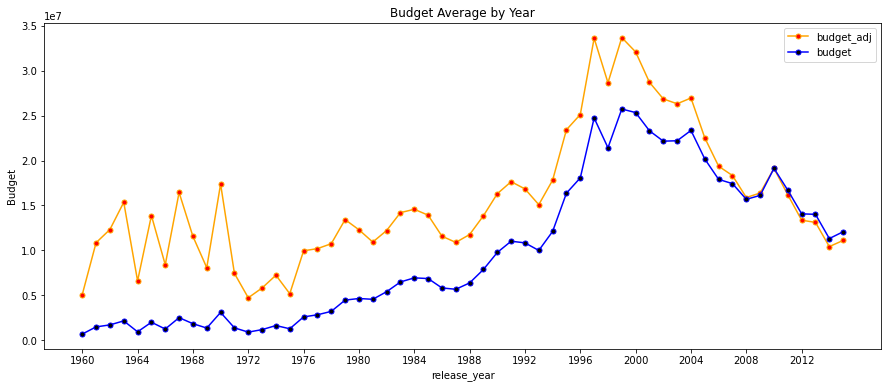

In [46]:
#check the average of Budget and adjusted Budget for each year
plt.subplots(figsize = (15,6))
y = moviesdata.groupby('release_year')['budget'].mean()
x = moviesdata.groupby('release_year')['budget_adj'].mean()

x.plot(kind='line', marker='o', markerfacecolor='red', markersize=5, color='orange', xticks = np.arange(1960,2016,4));
y.plot(kind='line', marker='o', markerfacecolor='black', markersize=5, color='blue', xticks = np.arange(1960,2016,4));

plt.gca().legend(('budget_adj','budget'))

plt.title('Budget Average by Year')
plt.ylabel('Budget')

#### Movie budget is in increasing trend, but in recent years, the average budget has been decreased. During the years between 1995 to 2005, average movie budget were higher than the remaining years.

### Further, I am interested in understanding the relations between features like Revenue, Budget, Vote Average, Popularity and Runtime. Hence, I will use scatter plot to understand the correlation and trend between these features of interest.

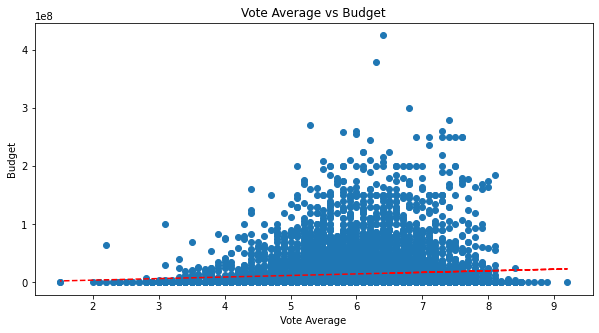

In [47]:
#Vote Average vs Budget
plt.subplots(figsize = (10,5))
x = moviesdata['vote_average']
y = moviesdata['budget']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Vote Average vs Budget')
plt.xlabel('Vote Average')
plt.ylabel('Budget')
plt.show()

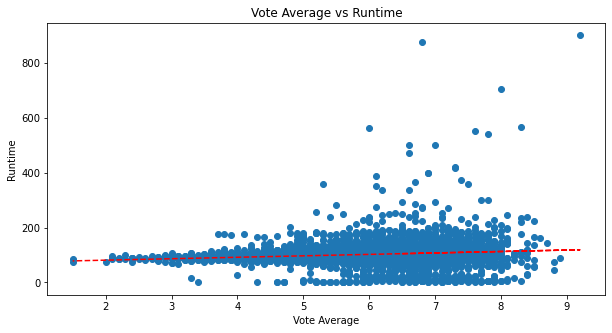

In [48]:
#Vote Average vs Runtime
plt.subplots(figsize = (10,5))
x = moviesdata['vote_average']
y = moviesdata['runtime']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Vote Average vs Runtime')
plt.xlabel('Vote Average')
plt.ylabel('Runtime')
plt.show()

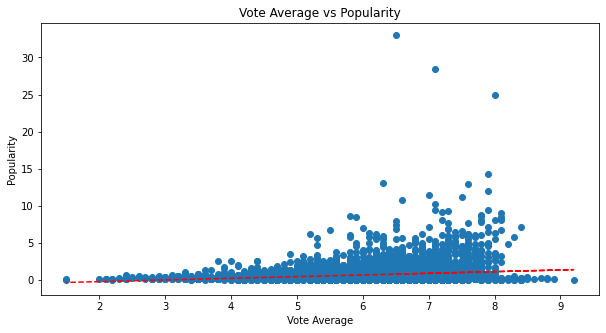

In [49]:
#Vote Average vs Popularity
plt.subplots(figsize = (10,5))
x = moviesdata['vote_average']
y = moviesdata['popularity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Vote Average vs Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()

#### From the above plots, I have observed that Vote Average is quietly related with Popularity, Budget and Runtime of the movie and hence a slight upward trend is observed.

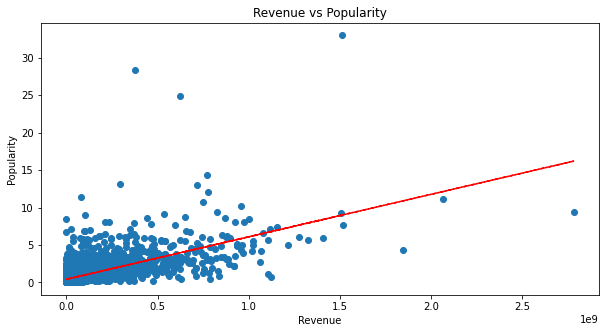

In [50]:
#Revenue vs Popularity
plt.subplots(figsize = (10,5))
x = moviesdata['revenue']
y = moviesdata['popularity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Revenue vs Popularity')
plt.xlabel('Revenue')
plt.ylabel('Popularity')
plt.show()

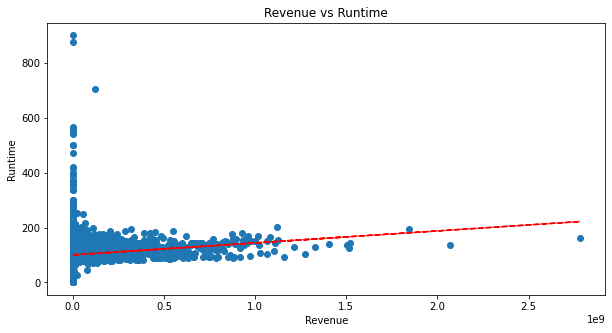

In [51]:
#Revenue vs Runtime
plt.subplots(figsize = (10,5))
x = moviesdata['revenue']
y = moviesdata['runtime']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Revenue vs Runtime')
plt.xlabel('Revenue')
plt.ylabel('Runtime')
plt.show()

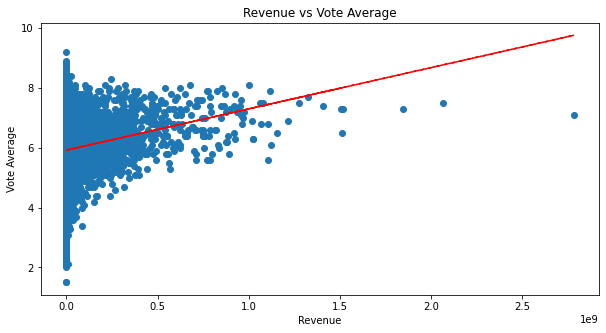

In [52]:
#Revenue vs Vote Average
plt.subplots(figsize = (10,5))
x = moviesdata['revenue']
y = moviesdata['vote_average']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Revenue vs Vote Average')
plt.xlabel('Revenue')
plt.ylabel('Vote Average')
plt.show()

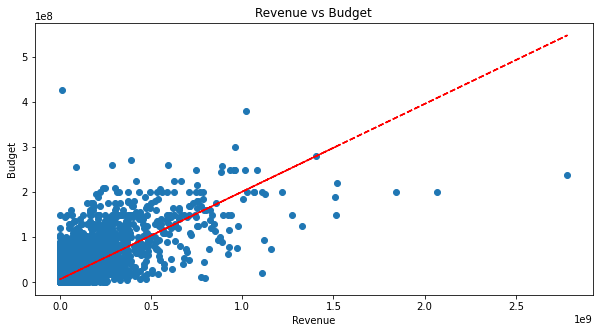

In [53]:
#Revenue vs Budget
plt.subplots(figsize = (10,5))
x = moviesdata['revenue']
y = moviesdata['budget']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Revenue vs Budget')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.show()

#### From the above plots of Revenue vs rest interest of features, it is clear that Revenue is highly correlated with Popularity and Budget. Also, it is slightly related with Vote Average and Runtime of the movie and hence a slight upward trend is observed.

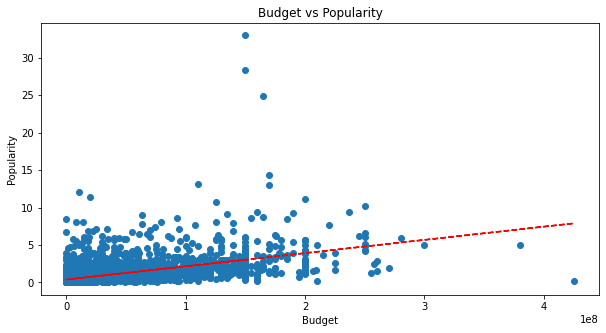

In [54]:
#Budget vs Popularity
plt.subplots(figsize = (10,5))
x = moviesdata['budget']
y = moviesdata['popularity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Budget vs Popularity')
plt.xlabel('Budget')
plt.ylabel('Popularity')
plt.show()

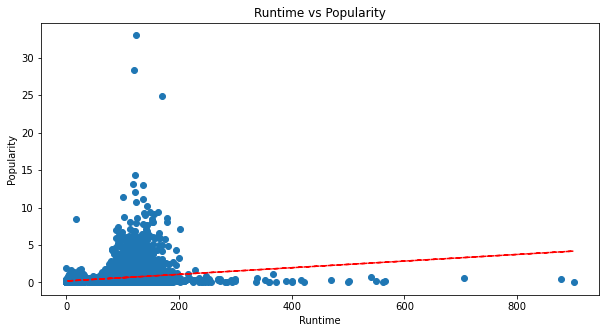

In [55]:
#Runtime vs Popularity
plt.subplots(figsize = (10,5))
x = moviesdata['runtime']
y = moviesdata['popularity']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Runtime vs Popularity')
plt.xlabel('Runtime')
plt.ylabel('Popularity')
plt.show()

#### Runtime and Popularity, Budget and Popularity are quietly correlated with each other.

### Conclusion:

#### Below is the overall conclusion drawn from the complete analysis.

* Maximum number of movies are 'Drama' based movies.
* Universal Pictures tops the list in making movies are their production house.
* Maximum number of movies are released in September and October month.
* Number of movies per year is increasing year-by-year.
* Maximum number of movies are made with low budget and have low revenue.
* Movie runtime is in decreasing trend.
* Revenue of the movie largely depends upon Popularity and the Budget of the movie, the rest of the features are though slightly correlated, but cannot draw proper conclusion from the plots generated. 

### Limitations:

* The dataset had high number of missing values overall. Also, high number of value - '0' was present in Revenue and Budget feature. Dropping the rows pertaining to missing values or treating value '0' might have impacted the overall analysis and would have resulted in incorrect trends and output, hence I had to go ahead with dropping the rows.
* Normalization of the currency in revenue and budget is not done, hence analysis is based on numbers only.
* There could have been more better features added in the dataset such as number of days completed by the movie in theaters after release, whether the movie was a hit or a flop etc., which would have helped in analyzing the performance of the movie.